## Capstone Two: The Ames House Prices Analysis

### DAC Student: Munkhjargal Tsogtsaikhan

---

###    <span style="color:blue">This analysis analyzes The Ames House Prices dataset for a home seller to predict proper seliing prices of houses based on three main segments including building, space, and location using advanced regression techniques.</span> 

###  <span style="color:green">Analyse My Dataset (Exploratory) and Synthesize Insights (Insights)</span>

### 1. Import the Python libraries:

In [1]:
# Import the Python libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
from scipy import stats
from scipy.stats import norm

---

### 2. Import Dataset:
**The data I've received from Kaggle has been split into three files: train, test, and sample_submission. I'd merged them into a complete dataframe for my analysis.**

In [2]:
# i. Import your dataset into a Jupyter Notebook and merge them into one dataframe.
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')
df3=pd.read_csv('sample_submission.csv')
df3.drop(['Id'], axis=1, inplace=True)
df4=pd.concat([df2, df3], axis=1)
df=pd.concat([df1, df4])
df.reset_index(drop=True, inplace=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659


**In order to understand meaning, type and relevance of the dataset to this problem, I can print out each variable on the combined dataframe.**

In [3]:
# ii. Print my combined dataframe using .info() function and explore variables on my combined dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

#### From the data and [overview](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) on Kaggle, I'll notice some keys that the dataset:
- describes (almost) every aspect of residential homes in Ames, Iowa.
- contains 2919 observations and 80 explanatory variables ([description of data](http://localhost:8890/edit/Desktop/Capstone%202/data_desc.txt)) including 43 categorical and 37 numerical.
- proves that much more influences to sale price than the number of bedrooms or a white-picket fence.
- defines three main segments including _building, space or location_.
    - _**Building** contains variables that relates to the physical characteristics of the building such as 'OverallQual'._ 
    - _**Space** contains variables that reports space properties of the house such as 'GrLivArea'._
    - _**Location** contains variables that gives information about the place where the house is located such as 'Street'._

#### After I've explored all the variables,  I've expected the numerical variables can play an important role in regression analysis:
- All numerical variables can be used to solve this problem.
- Most of categorical variables will be not used for regression analysis, but I will use for another analysis later.
---

### 3. Data Cleansing:

In [4]:
# Check missing values. if there are missing values more than 50% of the total values, I will drop them off.
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
dtype: int64

In [5]:
# Drop some columns with a lot of missing values.
df.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
df.shape

(2919, 76)

#### After I've checked missing values on the dataset,  'Alley', 'PoolQC', 'Fence', 'MiscFeature' had a lot of missing value (more than 50% ), so I've dropped them as well 'Id'.
---

### 4. Issues/Hypotheses to Explore:

### I. Explore Sale Prices:

**a. Create a Distribution shape and a Boxplot.**

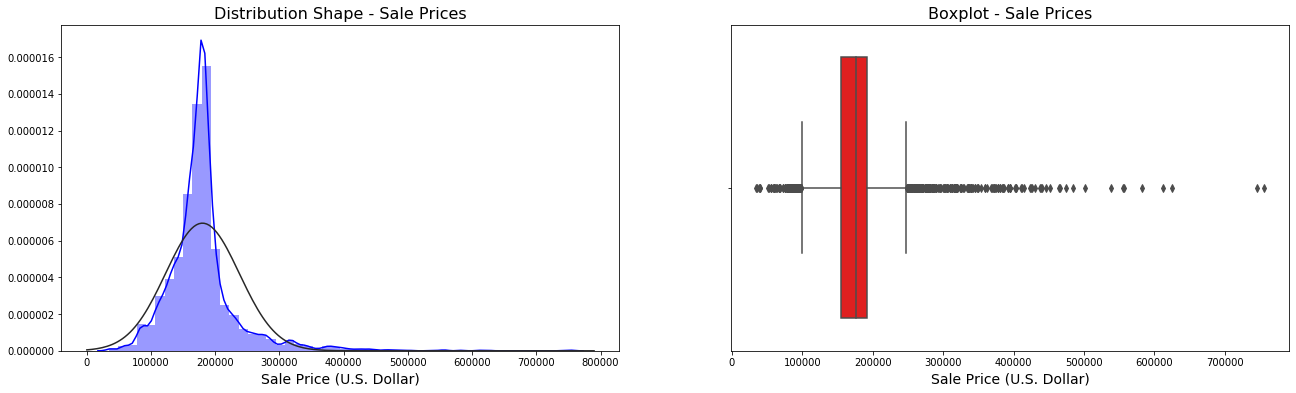

In [6]:
# Create a Distribution Shape and a Boxplot for Sale Prices.
plt.figure(figsize=(22,6))
plt.subplot(1, 2, 1)
sns.distplot(df['SalePrice'], color='blue', fit=norm)
plt.title('Distribution Shape - Sale Prices', fontsize=16)
plt.xlabel("Sale Price (U.S. Dollar)", fontsize=14)
plt.subplot(1, 2, 2)
sns.boxplot(df['SalePrice'], color='red')
plt.xlabel("Sale Price (U.S. Dollar)", fontsize=14)
plt.title('Boxplot - Sale Prices', fontsize=16)
plt.show()

**b. Create descriptive statistics.**

In [7]:
# Print descriptive statistics on my targeted variable using .describe(). and round them into two decimal.
print('Coef of Var: ' + str(round((df['SalePrice'].std()/df['SalePrice'].mean()), 2)))
print('Skewness:    ' + str(round(df['SalePrice'].skew(), 2)))
print('Kurtosis:    ' + str(round(df['SalePrice'].kurt(), 2)))
print('IQR:         ' + str(round((df['SalePrice'].quantile(0.75)-df['SalePrice'].quantile(0.25)), 2)))
print('-------------------')
print(round(df['SalePrice'].describe(), 2))

Coef of Var: 0.32
Skewness:    2.55
Kurtosis:    14.67
IQR:         37100.66
-------------------
count      2919.00
mean     180052.85
std       57381.57
min       34900.00
25%      154795.08
50%      176734.84
75%      191895.74
max      755000.00
Name: SalePrice, dtype: float64


#### From analyzing the distribution shape, the boxplot and the descriptive statisics for Sale Prices, I'll notice that:
* **SalePrice** in the dataset presents selling price in dollars on house market. This is the target dependent variable that I'm trying to predict.
* **Distribution Shape:** The targeted variable is not normally distributed, fits in Guassian kernel estimation and has Sharper peak than Bell-Shaped distribution. It has Right (Positive) skewness that shows distribution shape is asymmetric. 

* **Boxplot:** Sale Price has outliers at the upper tail mostly and positive kurtosis that describes relative concentration of values in the center as compared to the tails. IQR is 1.55 times smaller than standard deviation.  The middle 50% of data in the dataset is between 154,795.08 and 191,895.74 U.S dollars.
---

### II. Explore a relationshp between Sale Prices vs Each Variable:

**a. Create a Correlation Matrix at Heatmap.**

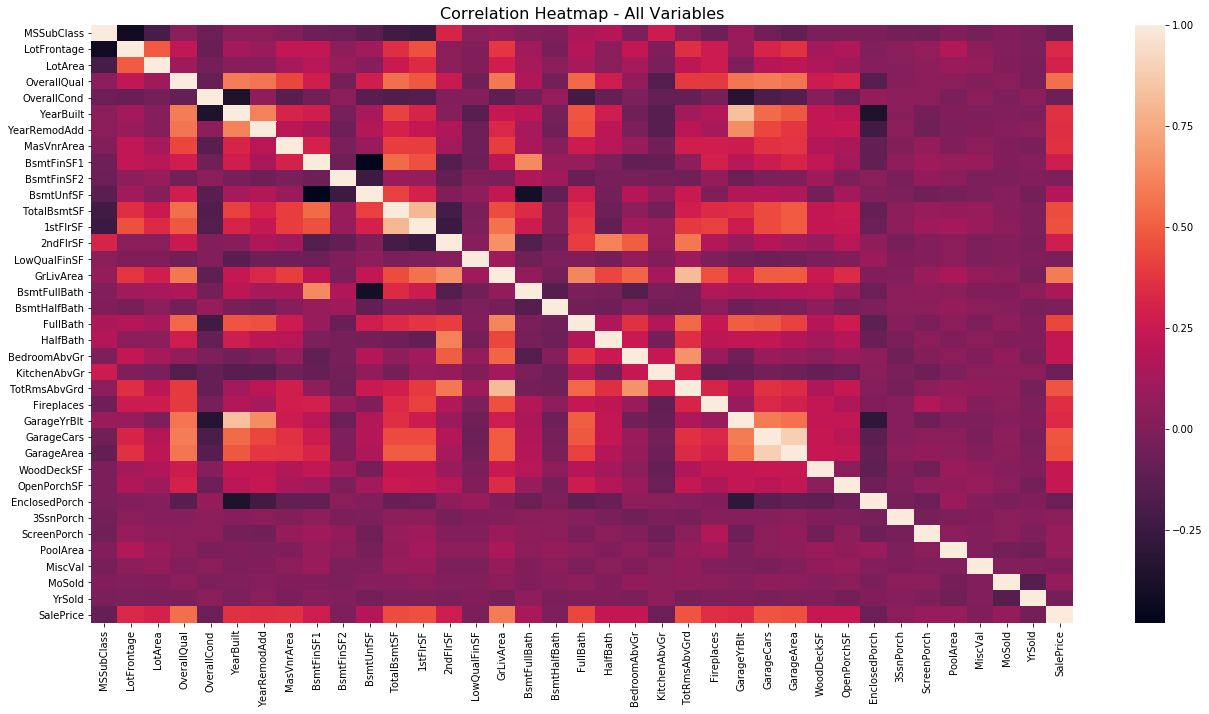

In [8]:
# Check relationship between SalePrice and all 37 numerical variables.
df_corr=round(df.corr(),2)
fig, axis=plt.subplots(figsize=(22,11))
plt.title('Correlation Heatmap - All Variables', fontsize=16)
sns.heatmap(df_corr)
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

**b. Create a Correlation Matrix at Barplot.**

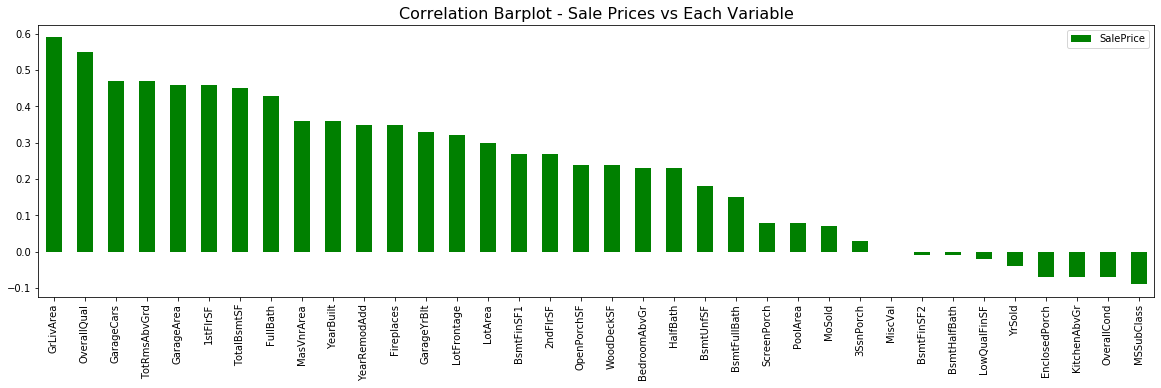

In [9]:
# Create a Correlation Barplot for Sale Prices vs each 37 numerical variable.
y_df_corr=df_corr.loc[:, ['SalePrice']]
y_df_corr.drop('SalePrice').sort_values(by=['SalePrice'], ascending=False).plot(kind='bar', figsize=(20,5), color='green')
plt.title('Correlation Barplot - Sale Prices vs Each Variable', fontsize=16)
plt.show()

#### Based on the correlation barplot and  heatmap,  I'll notice the following: 
* There is a relatively strong positive linear relationship between **Sale Price vs 'GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea','1stFlrSF', 'TotalBsmtSF', 'FullBath' and 'YearBuilt.**
* These variables move in same directions and have positive linear relationships.
* I'll create targeted independent variables with over 0.20 correlation coeff against the Sale Prices of the houses for this prediction.

---

### III.  Declare independent variables ([description of data](http://localhost:8890/edit/Desktop/Capstone%202/data_desc.txt)):

**a. Declare targeted independent variables for this analysis.**

In [10]:
# Filter independent variables with a relative correlation (more than 0.20).
var=df_corr[df_corr['SalePrice'] > 0.20].drop('SalePrice').sort_values(by='SalePrice', ascending=False).index
targ_ind1 = df.filter(var)
print('Targeted Independent variables filtered by correlation: '  + str(len(targ_ind1.columns)))
print('-----------------------------------------------------------------------------')
var

Targeted Independent variables filtered by correlation: 21
-----------------------------------------------------------------------------


Index(['GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'MasVnrArea',
       'YearRemodAdd', 'Fireplaces', 'GarageYrBlt', 'LotFrontage', 'LotArea',
       '2ndFlrSF', 'BsmtFinSF1', 'WoodDeckSF', 'OpenPorchSF', 'BedroomAbvGr',
       'HalfBath'],
      dtype='object')

**b. Create a Correlation Matrix at Heatmap for targeted independent variables.**

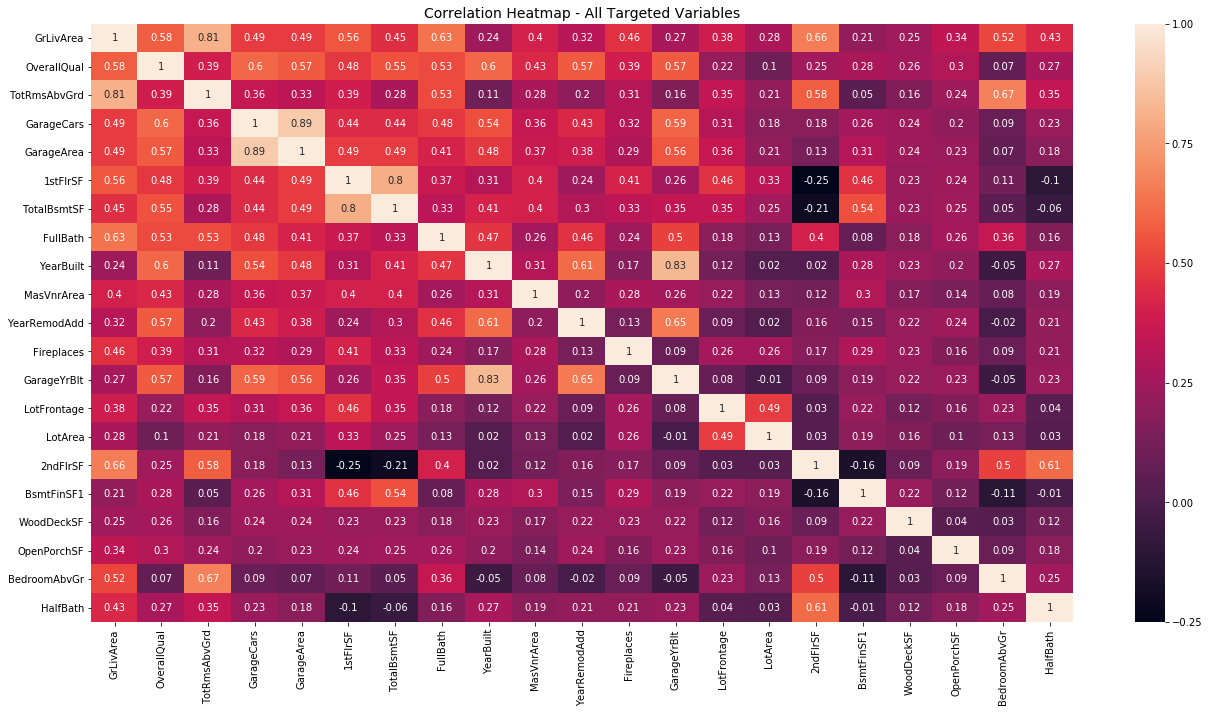

In [11]:
fig, axis=plt.subplots(figsize=(22,11))
targ_ind_corr=round(targ_ind1.corr(), 2)
plt.title('Correlation Heatmap - All Targeted Variables', fontsize=14)
ax=sns.heatmap(targ_ind_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

**c. Create a dataframe for targeted all variables**

In [12]:
# Create a dataframe for targeted all variables.
targ_all = df.filter(['SalePrice', 'GrLivArea', 'OverallQual', 'GarageArea',
                    'TotalBsmtSF', 'FullBath', 'YearBuilt', 'MasVnrArea', 'Fireplaces', 'LotArea',
                       '2ndFlrSF', 'BsmtFinSF1', 'WoodDeckSF', 'OpenPorchSF', 'BedroomAbvGr', 'HalfBath'])
targ_all.dropna(inplace=True)
targ_ind=targ_all.filter(['GrLivArea', 'OverallQual', 'GarageArea',
                    'TotalBsmtSF', 'FullBath', 'YearBuilt', 'MasVnrArea', 'Fireplaces', 'LotArea',
                       '2ndFlrSF', 'BsmtFinSF1', 'WoodDeckSF', 'OpenPorchSF', 'BedroomAbvGr', 'HalfBath'])
targ_dep=targ_all.filter(['SalePrice'])
targ_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2894 entries, 0 to 2918
Data columns (total 16 columns):
SalePrice       2894 non-null float64
GrLivArea       2894 non-null int64
OverallQual     2894 non-null int64
GarageArea      2894 non-null float64
TotalBsmtSF     2894 non-null float64
FullBath        2894 non-null int64
YearBuilt       2894 non-null int64
MasVnrArea      2894 non-null float64
Fireplaces      2894 non-null int64
LotArea         2894 non-null int64
2ndFlrSF        2894 non-null int64
BsmtFinSF1      2894 non-null float64
WoodDeckSF      2894 non-null int64
OpenPorchSF     2894 non-null int64
BedroomAbvGr    2894 non-null int64
HalfBath        2894 non-null int64
dtypes: float64(5), int64(11)
memory usage: 384.4 KB


**d. Create descriptive statistics for each targeted variables.**

In [13]:
# Print descriptive statistics on targeted independent variables using .describe(). and round them into two decimal.
targ_ind.describe()

,GrLivArea,OverallQual,GarageArea,TotalBsmtSF,FullBath,YearBuilt,MasVnrArea,Fireplaces,LotArea,2ndFlrSF,BsmtFinSF1,WoodDeckSF,OpenPorchSF,BedroomAbvGr,HalfBath
count,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000
mean,1499.577747,6.080511,472.394955,1050.684865,1.564271,1971.089150,102.271942,0.596752,10163.474775,335.711472,441.212854,93.932965,47.210090,2.861092,0.378023
std,506.859309,1.408856,215.577705,440.810115,0.552012,30.262597,179.376091,0.646298,7905.345988,428.391200,455.271827,126.775306,67.390762,0.823556,0.501792
min,334.000000,1.000000,0.000000,0.000000,0.000000,1872.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1124.000000,5.000000,319.250000,792.000000,1.000000,1953.000000,0.000000,0.000000,7449.250000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,1442.000000,6.000000,478.000000,988.500000,2.000000,1972.500000,0.000000,1.000000,9452.500000,0.000000,368.000000,0.000000,26.000000,3.000000,0.000000
75%,1742.750000,7.000000,576.000000,1300.000000,2.000000,2000.000000,164.000000,1.000000,11555.250000,702.750000,733.000000,168.000000,69.750000,3.000000,1.000000
max,5642.000000,10.000000,1488.000000,6110.000000,4.000000,2010.000000,1600.000000,4.000000,215245.000000,2065.000000,5644.000000,1424.000000,742.000000,8.000000,2.000000


**e. Create Scatterplot for Each targeted independent variable vs Sale Prices**

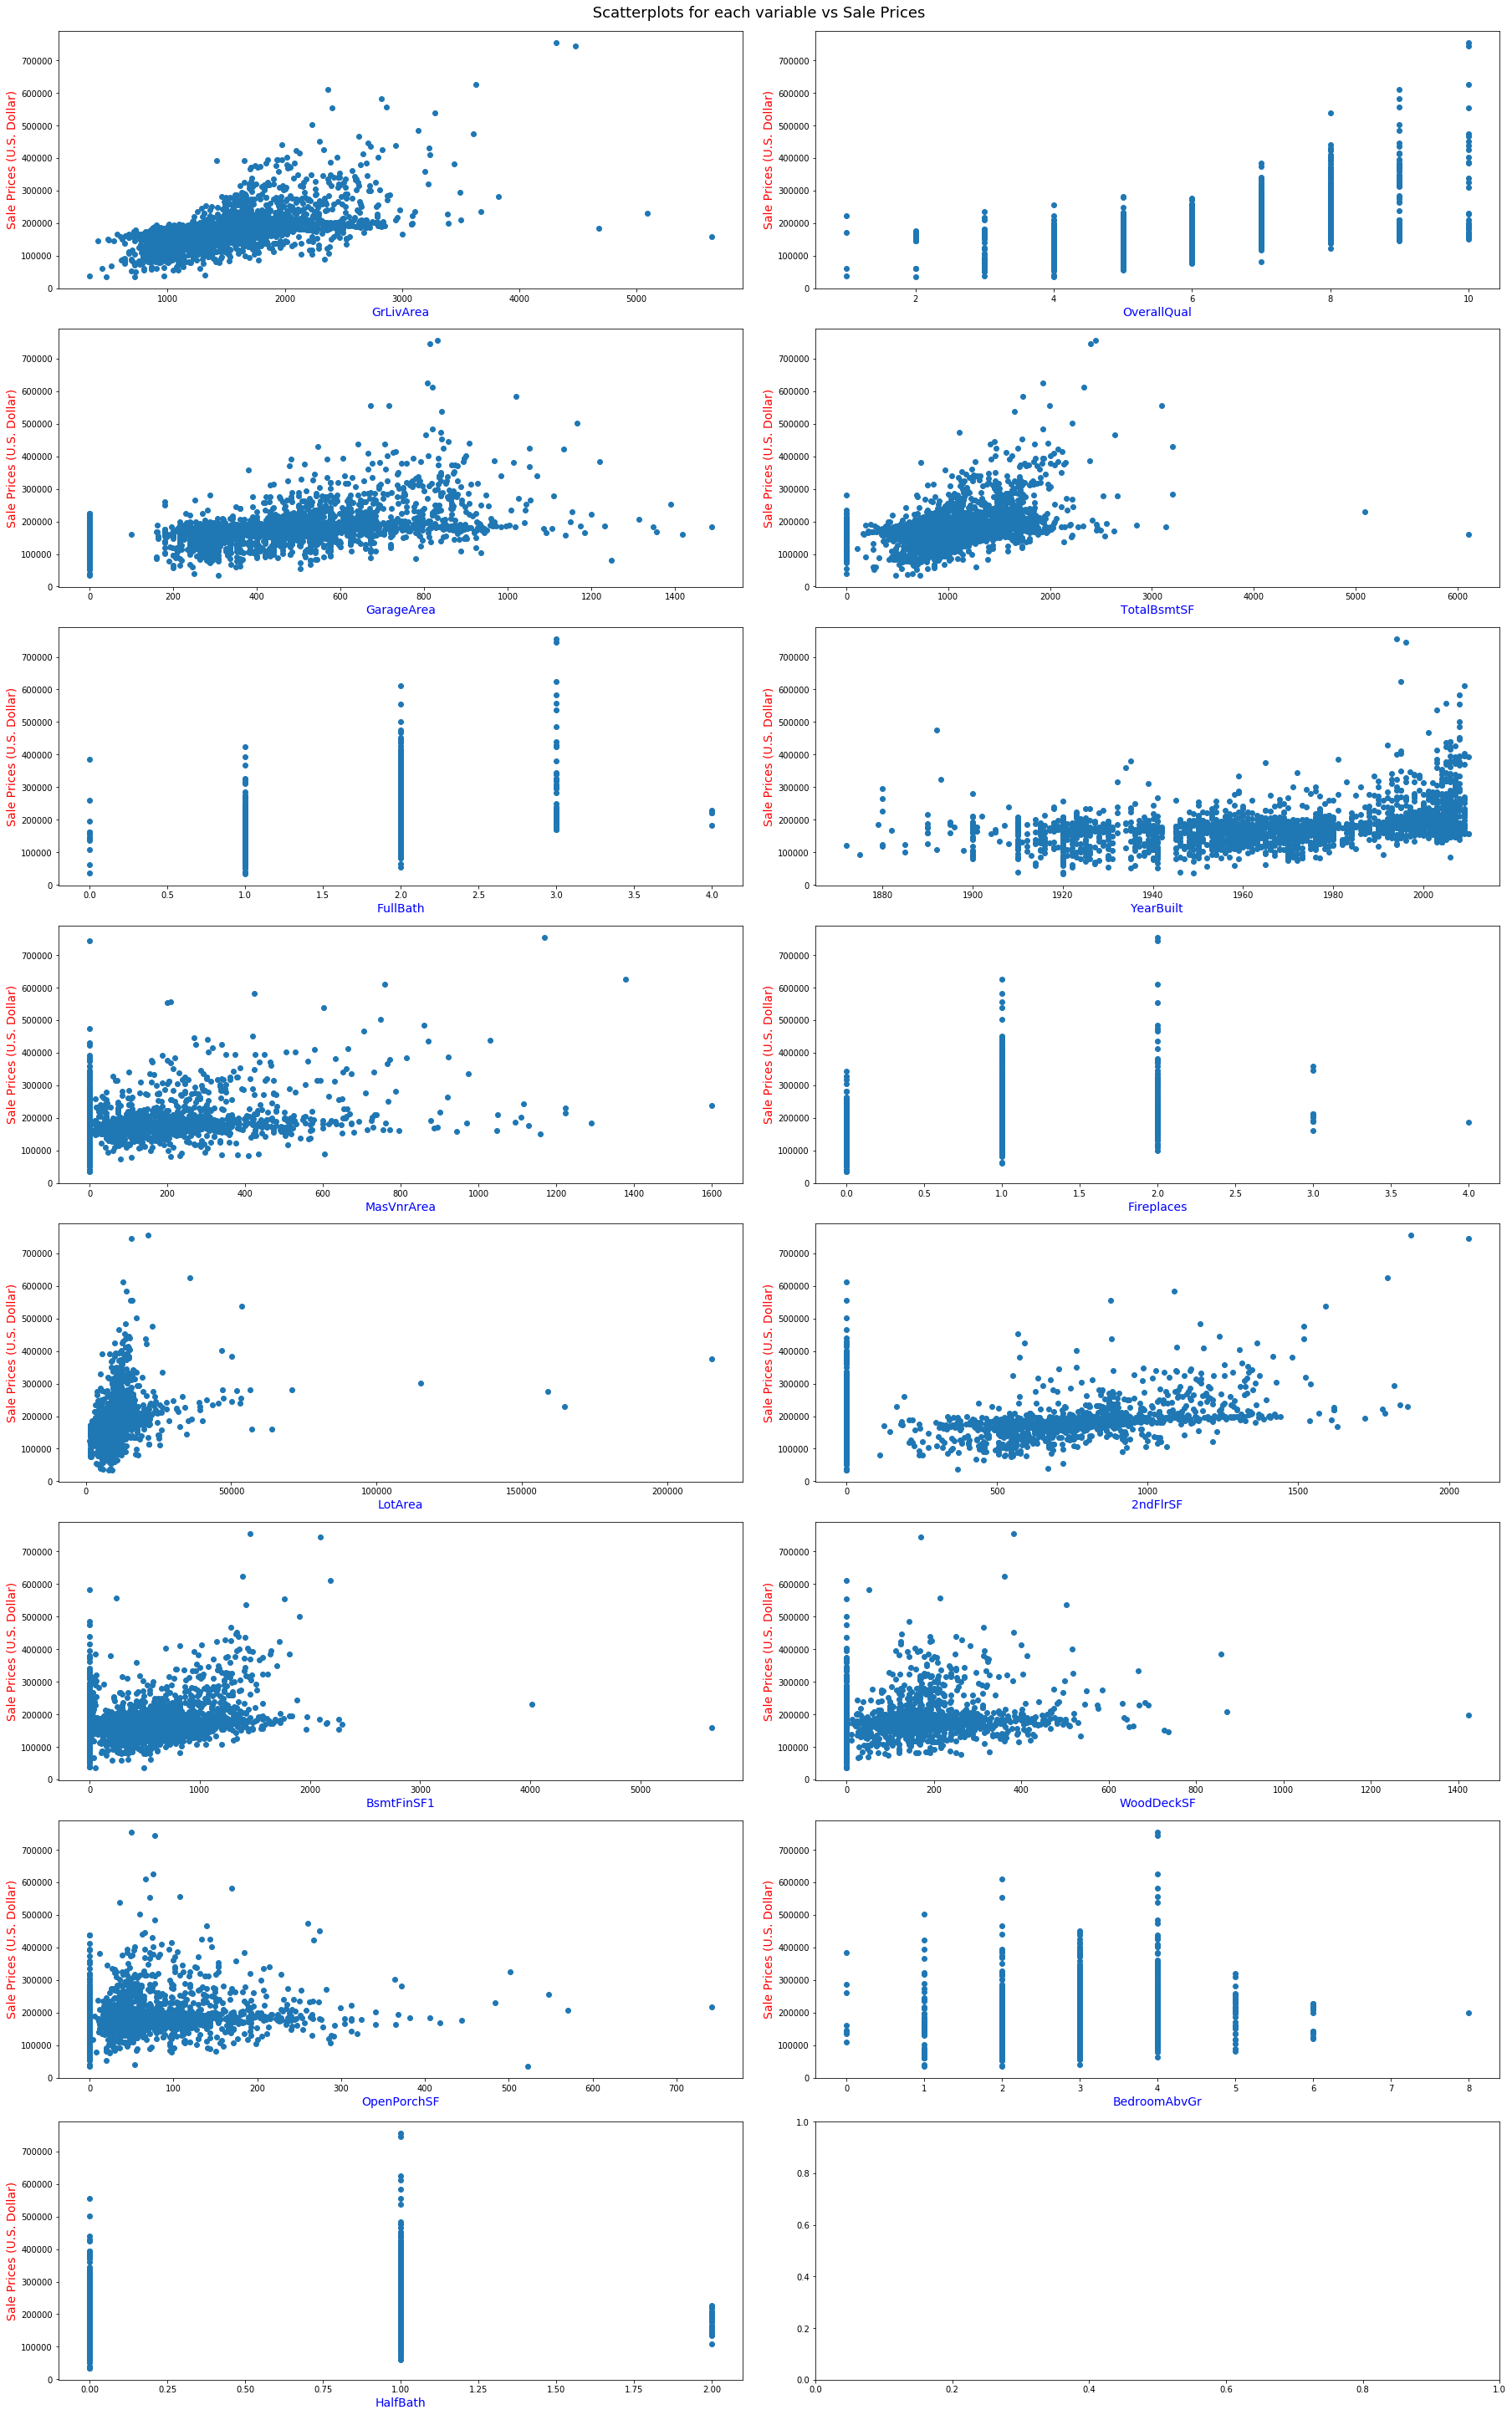

In [14]:
# Create Scatterplots for Sale Prices vs each variable with a relative correlation.
fig, axes = plt.subplots(8, 2, figsize=(25,40), constrained_layout=True)
fig.suptitle(' Scatterplots for each variable vs Sale Prices', size=18)
axes=axes.flatten()
for i, y in enumerate(targ_ind):
    ax=axes[i]
    ax.set_xlabel(y, color='blue', size=14)
    ax.set_ylabel('Sale Prices (U.S. Dollar)', color='red', size=14)
    ax.plot(targ_ind[y], targ_dep, marker='o', linestyle='')

**f. Pick independent variables while testing p-value**

In [15]:
# i. Model with constant coef
X = sm.add_constant(targ_ind)
model=sm.OLS(targ_dep, X).fit()
sum = model.summary()
print(sum)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     163.5
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:16:12   Log-Likelihood:                -34924.
No. Observations:                2894   AIC:                         6.988e+04
Df Residuals:                    2878   BIC:                         6.998e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -2.99e+05   7.74e+04     -3.861   

C:\Users\MJ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
# ii. Model without constant coef
model1=sm.OLS(targ_dep, targ_ind).fit()
sum1 = model1.summary()
print(sum1)

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              3641.
Date:                Wed, 22 Apr 2020   Prob (F-statistic):                        0.00
Time:                        01:16:12   Log-Likelihood:                         -34931.
No. Observations:                2894   AIC:                                  6.989e+04
Df Residuals:                    2879   BIC:                                  6.998e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

#### Note1: GarageCars and GarageArea had a strong relationship because of they've described same feature , so I've dropped GarageCars.
#### Note2: I think GrLivArea and TotRmsAbvGrd describe allmost same feature because of they've had a strong relatioship, so I've dropped TotRmsAbvGrd.
#### Note3: I think 1stFlrSF and TotalBsmtSF describe allmost same feature because of they've had a strong relatioship, so I've dropped 1stFlrSF.
#### Note4: I think YearBuilt and YearRemodAdd describe allmost same feature because of they've had a strong relatioship, so I've dropped YearRemodAdd.
#### Note 5: Missing Values: GarageYrBlt, LotFrontage
#### Note 6: Significant t-test:  'MasVnrArea, Fireplaces , OpenPorchSF, HalfBath, 2ndFlrSF, 'WoodDeckSF and HalfBath have not passed t-test with 95% confident level.

In [17]:
# iii. Filter independent variables with a relative correlation (more than 0.20) and stand for this regression model.
print('-----------------------------------------------------------------------------------------')
print('The independent variable description:')
print('-----------------------------------------------------------------------------------------')
print ('1. ' + var[0] + ':     ' + "Above grade (ground) living area square feet ")
print ('2. ' + var[1] + ':   ' + "Rates (10-1) the overall material and finish of the house")
print ('3. ' + var[2] + ':  ' + "Total rooms above grade (does not include bathrooms)")
print ('4. ' + var[4] + ':    ' + "Size of garage in square feet")
print ('5. ' + var[6] + ':   ' + "Total square feet of basement area")
print ('6. ' + var[7] + ':      ' + "Full bathrooms above grade")
print ('7. ' + var[8] + ':     ' + "Original construction date")
print ('8. ' + var[-7] + ':       ' + "Lot size in square feet")
print ('9. ' + var[-2] + ':  ' + "BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)")
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
The independent variable description:
-----------------------------------------------------------------------------------------
1. GrLivArea:     Above grade (ground) living area square feet 
2. OverallQual:   Rates (10-1) the overall material and finish of the house
3. TotRmsAbvGrd:  Total rooms above grade (does not include bathrooms)
4. GarageArea:    Size of garage in square feet
5. TotalBsmtSF:   Total square feet of basement area
6. FullBath:      Full bathrooms above grade
7. YearBuilt:     Original construction date
8. LotArea:       Lot size in square feet
9. BedroomAbvGr:  BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
-----------------------------------------------------------------------------------------


#### Above variables stand for and here's a brief version of what I'va found in the data description file:
1. **GrLivArea:**     Above grade (ground) living area square feet 
2. **OverallQual:**  Rates (10-1) the overall material and finish of the house
3. **GarageArea:**	 Size of garage in square feet
4. **TotalBsmtSF:**  Total square feet of basement area
5. **FullBath:**     Full bathrooms above grade
6. **YearBuilt:**	 Construction date
7. **LotArea:** 	   Lot size in square feet
8. **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)

**g. Create a dataframe for independent variables**

In [18]:
# Create a dataframe for targeted all variables.
var_all = targ_all.filter(['SalePrice', 'GrLivArea', 'OverallQual', 'GarageArea', 'TotalBsmtSF', 
                           'FullBath', 'YearBuilt', 'LotArea', 'BedroomAbvGr'])
ind=var_all.filter(['GrLivArea', 'OverallQual', 'GarageArea', 'TotalBsmtSF', 
                           'FullBath', 'YearBuilt', 'LotArea', 'BedroomAbvGr'])
dep=var_all.filter(['SalePrice'])
ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2894 entries, 0 to 2918
Data columns (total 8 columns):
GrLivArea       2894 non-null int64
OverallQual     2894 non-null int64
GarageArea      2894 non-null float64
TotalBsmtSF     2894 non-null float64
FullBath        2894 non-null int64
YearBuilt       2894 non-null int64
LotArea         2894 non-null int64
BedroomAbvGr    2894 non-null int64
dtypes: float64(2), int64(6)
memory usage: 203.5 KB


**h. Create Boxplots for independent variables.**

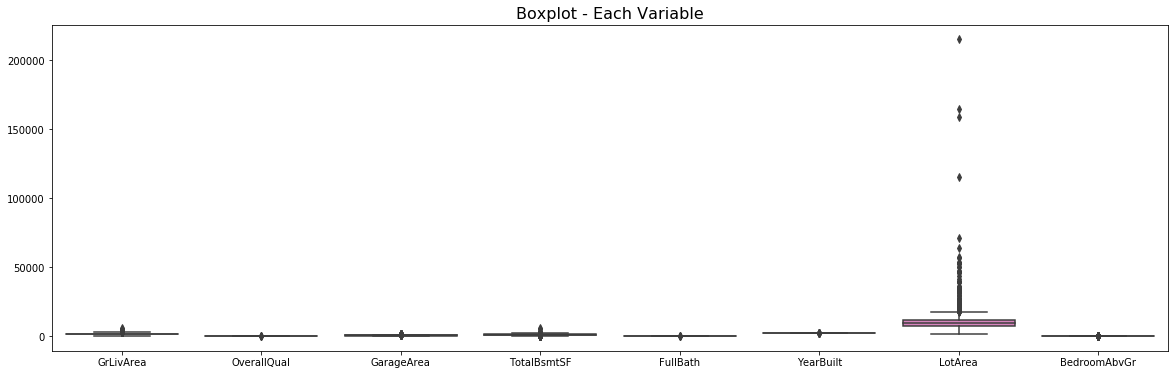

In [19]:
# i. Create a Boxplot for each independent variable.
plt.figure(figsize=(20,6))
sns.boxplot(data=ind)
plt.title('Boxplot - Each Variable', fontsize=16)
plt.show()

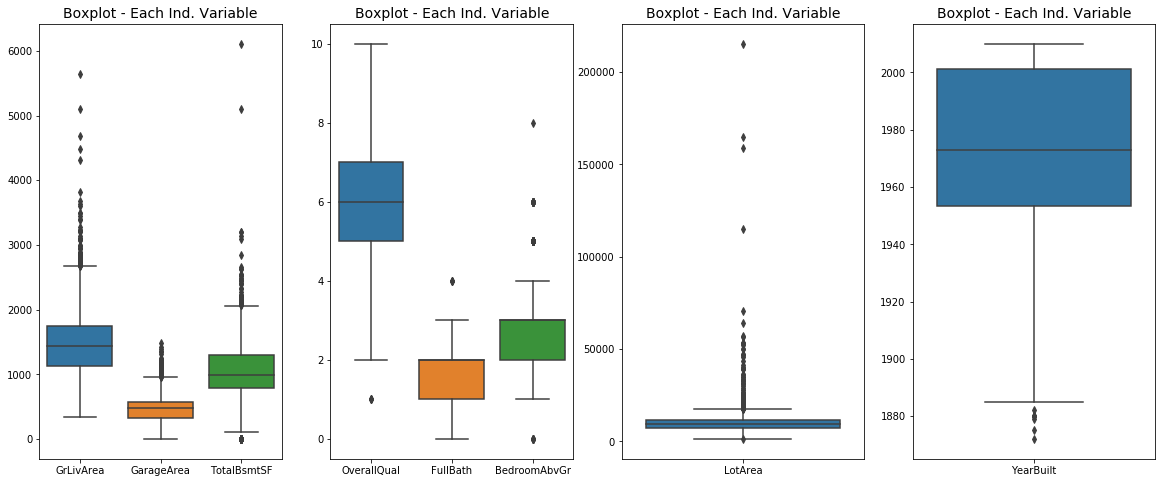

In [20]:
# split them into four figures in order to visualize better.
plt.figure(figsize=(20,8))
plt.subplot(1, 4, 1)
sns.boxplot(data=df.filter(['GrLivArea', 'GarageArea', 'TotalBsmtSF']))
plt.title('Boxplot - Each Ind. Variable', fontsize=14)
plt.subplot(1, 4, 2)
sns.boxplot(data=df.filter(['OverallQual', 'FullBath', 'BedroomAbvGr']))
plt.title('Boxplot - Each Ind. Variable', fontsize=14)
plt.subplot(1, 4, 3)
sns.boxplot(data=df.filter(['LotArea']))
plt.title('Boxplot - Each Ind. Variable', fontsize=14)
plt.subplot(1, 4, 4)
sns.boxplot(data=df.filter(['YearBuilt']))
plt.title('Boxplot - Each Ind. Variable', fontsize=14)
plt.show()

**i. Create quartiles for all variables.**

In [21]:
# Create Quartiles for each variable.
q1_qtl = var_all.quantile(0.25)
q3_qtl = var_all.quantile(0.75)
IQR = round((q3_qtl - q1_qtl), 0)
print('The interquartile range (IQR) for all variables:')
print('-----------------------------------------------')
print(IQR)
print('-----------------------------------------------')

The interquartile range (IQR) for all variables:
-----------------------------------------------
SalePrice       37443.0
GrLivArea         619.0
OverallQual         2.0
GarageArea        257.0
TotalBsmtSF       508.0
FullBath            1.0
YearBuilt          47.0
LotArea          4106.0
BedroomAbvGr        1.0
dtype: float64
-----------------------------------------------


**h. Identify outliers and remove them.**  

In [22]:
# i. Remove outliers and create a dataframe without outliers for all variables.
var_out= var_all[~((var_all < (q1_qtl - 3.5 * IQR)) | (var_all > (q3_qtl + 3.5 * IQR))).any(axis=1)]

# ii. Calculate the entire entries.
print ("When we have not removed any outliers from the dataset, we have " + str(len(var_all)) + " entries")

# iii. Find the proportion of outliers that exist in the dataset
print ("When we have removed any outliers from the dataset, we have " + str(len(var_out)) + " entries")
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(round(len(var_out)/len(var_all), 3)))
print(var_out.shape)

When we have not removed any outliers from the dataset, we have 2894 entries
When we have removed any outliers from the dataset, we have 2775 entries
The proportion of outliers which exist when compared to the dataframe are: 0.959
(2775, 9)


**Note: The Empirical Rule - Approximately 99.7% of the data in a bell-shaped distribution lies within ± three standard deviations of the mean, or µ ± 3σ. 95%: µ ± 2σ**

**i. Create Boxplots without outliers.**

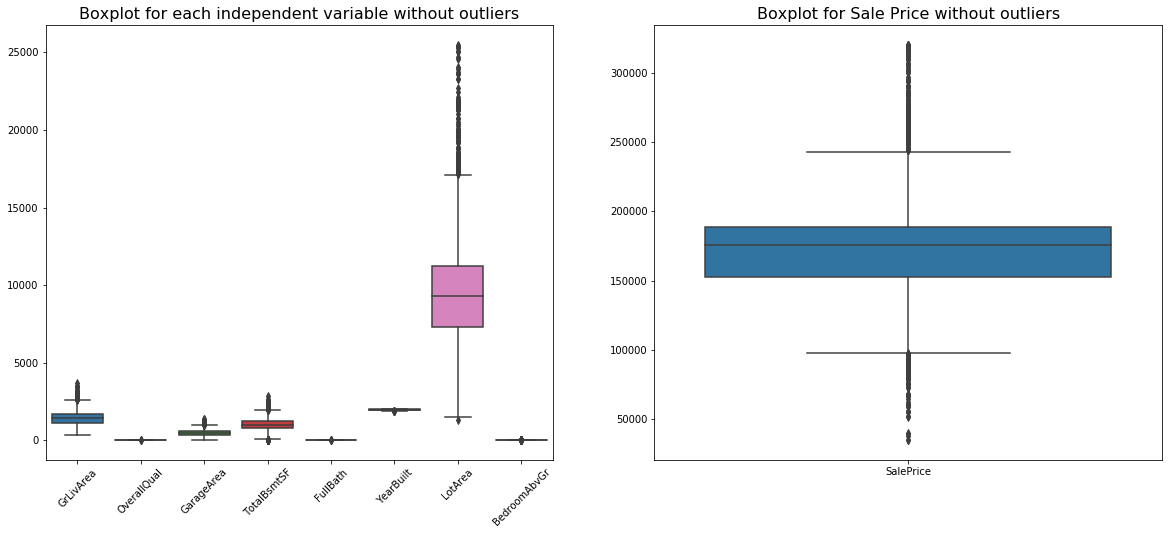

In [23]:
# i. Create a Boxplot for each independent variable without outliers.
ind_out=var_out.filter(['GrLivArea', 'OverallQual', 'GarageArea', 'TotalBsmtSF', 
                           'FullBath', 'YearBuilt', 'LotArea', 'BedroomAbvGr'])
dep_out=var_out.filter(['SalePrice'])
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.boxplot(data=ind_out)
plt.xticks(rotation=45)
plt.title('Boxplot for each independent variable without outliers', fontsize=16)
plt.subplot(1, 2, 2)
sns.boxplot(data=dep_out)
plt.title('Boxplot for Sale Price without outliers', fontsize=16)
plt.show()

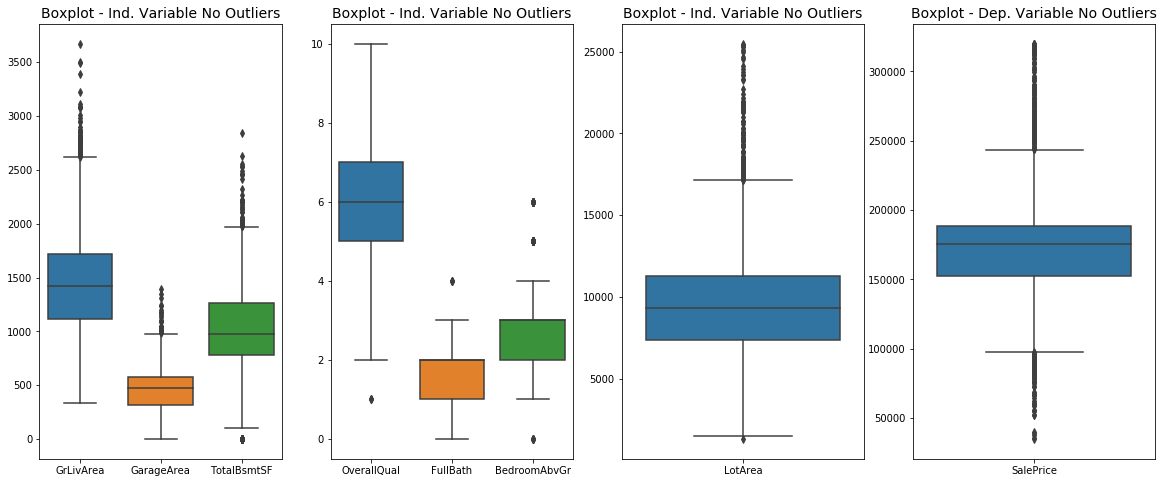

In [24]:
# ii. Split them into four figures in order to visualize/view better.
plt.figure(figsize=(20,8))
plt.subplot(1, 4, 1)
sns.boxplot(data=var_out.filter(['GrLivArea', 'GarageArea', 'TotalBsmtSF']))
plt.title('Boxplot - Ind. Variable No Outliers', fontsize=14)
plt.subplot(1, 4, 2)
sns.boxplot(data=var_out.filter(['OverallQual', 'FullBath', 'BedroomAbvGr']))
plt.title('Boxplot - Ind. Variable No Outliers', fontsize=14)
plt.subplot(1, 4, 3)
sns.boxplot(data=var_out.filter(['LotArea']))
plt.title('Boxplot - Ind. Variable No Outliers', fontsize=14)
plt.subplot(1, 4, 4)
sns.boxplot(data=var_out.filter(['SalePrice']))
plt.title('Boxplot - Dep. Variable No Outliers', fontsize=14)
plt.show()

**j. Descriptive statistics on my all variables (no outliers).**

In [25]:
# Print descriptive statistics on my targeted variable (no outliers) using .describe(). and round them into two decimal.
print('SalePrice(No Outlrs):')
print('--------------------')
print('CV ' + str(round((dep_out['SalePrice'].std()/dep_out['SalePrice'].mean()), 2)))
print('Skew ' + str(round(dep_out['SalePrice'].skew(), 2)))
print('Kurt ' + str(round(dep_out['SalePrice'].kurt(), 2))) 
print('IQR:'+ str(round((dep_out['SalePrice'].quantile(0.75)-dep_out['SalePrice'].quantile(0.25)), 2)))
round(var_out.describe(), 0)

SalePrice(No Outlrs):
--------------------
CV 0.24
Skew 0.4
Kurt 1.81
IQR:36420.22


,SalePrice,GrLivArea,OverallQual,GarageArea,TotalBsmtSF,FullBath,YearBuilt,LotArea,BedroomAbvGr
count,2775.0,2775.0,2775.0,2775.0,2775.0,2775.0,2775.0,2775.0,2775.0
mean,172843.0,1465.0,6.0,461.0,1025.0,2.0,1970.0,9446.0,3.0
std,41079.0,462.0,1.0,207.0,401.0,1.0,30.0,3735.0,1.0
min,34900.0,334.0,1.0,0.0,0.0,0.0,1872.0,1300.0,0.0
25%,152465.0,1112.0,5.0,312.0,782.0,1.0,1953.0,7330.0,2.0
50%,175648.0,1422.0,6.0,472.0,975.0,2.0,1972.0,9291.0,3.0
75%,188885.0,1716.0,7.0,576.0,1260.0,2.0,2000.0,11250.0,3.0
max,320000.0,3672.0,10.0,1390.0,2846.0,4.0,2010.0,25485.0,6.0


**k. Create a Distribution shape and a Boxplot (no outliers).**

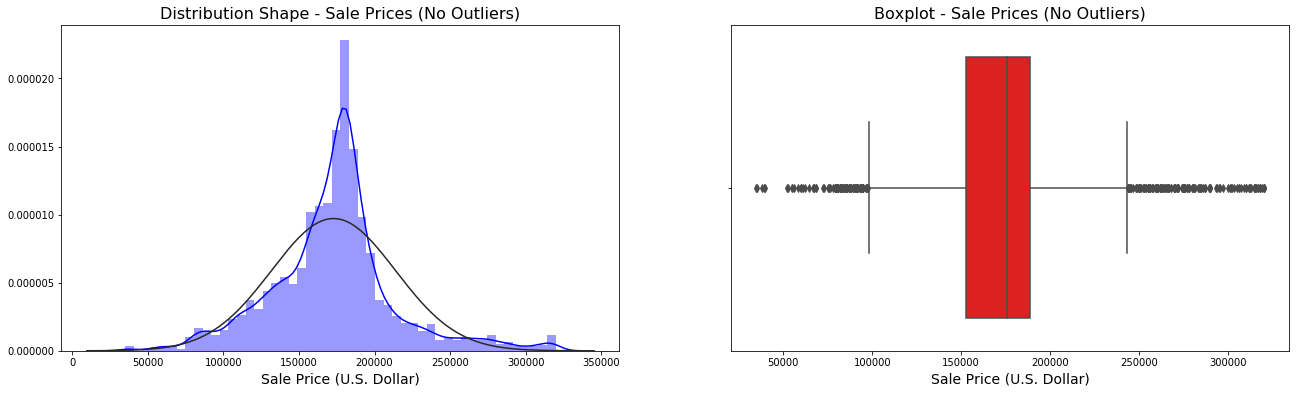

In [26]:
# Create Distribution Shape and Boxplot for Sale Prices without outliers.
plt.figure(figsize=(22,6))
plt.subplot(1, 2, 1)
sns.distplot(dep_out, color='blue', fit=norm)
plt.title('Distribution Shape - Sale Prices (No Outliers)', fontsize=16)
plt.xlabel("Sale Price (U.S. Dollar)", fontsize=14)
plt.subplot(1, 2, 2)
sns.boxplot(dep_out, color='red')
plt.xlabel("Sale Price (U.S. Dollar)", fontsize=14)
plt.title('Boxplot - Sale Prices (No Outliers)', fontsize=16)
plt.show()

#### Based on above analysis I've created, I've likely come to the conclusion that, for this analysis, I actually picked 8 independent variables and use 95.9% of the data in the dataset after removing outliers for this regression analysis. 

---

### IV. Creating a Multivariate Regression Model:

**a. Use OLS Regression.**

In [27]:
# i. Create a regression equation that models the Sales Price (Y-Variable) against all the independent variables.
model=sm.OLS(dep_out, ind_out).fit()
sum = model.summary()
print(sum)

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          1.105e+04
Date:                Wed, 22 Apr 2020   Prob (F-statistic):                        0.00
Time:                        01:16:14   Log-Likelihood:                         -32631.
No. Observations:                2775   AIC:                                  6.528e+04
Df Residuals:                    2767   BIC:                                  6.533e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

#### The multilinear regression model  seems to be an excelent fit  for the Ames house prices dataset because R-sqr is so high (0.97) and Adjusted R-sqr is same as the R-sqr that i don't need to remove any variables.

**b. Predict Sale Prices.**

In [28]:
# Create a dataframe for Predicted Sale Prices and Sale Prices.
predicted =round(model.predict(ind_out), 1)
pre=predicted.rename('PredictedPrice')
prices=pd.concat([pre, dep_out], axis=1)
prices

,PredictedPrice,SalePrice
0,186604.0,208500.000000
1,175239.7,181500.000000
2,194329.9,223500.000000
3,181485.2,140000.000000
4,224514.4,250000.000000
...,...,...
2914,124198.7,167081.220949
2915,129358.0,164788.778231
2916,185980.6,219222.423400
2917,147845.9,184924.279659


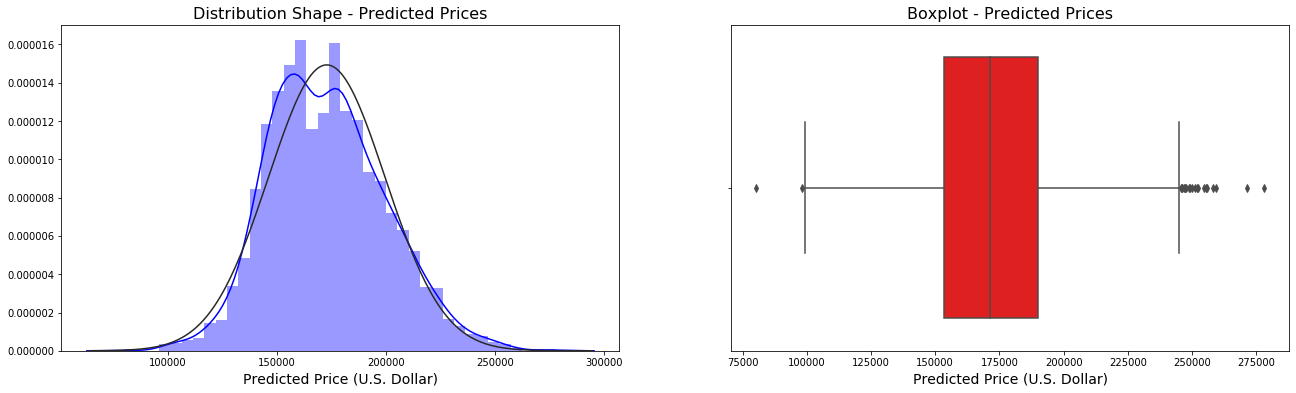

In [29]:
# Create Distribution Shape and Boxplot for PredictedPrice.
plt.figure(figsize=(22,6))
plt.subplot(1, 2, 1)
sns.distplot(prices['PredictedPrice'], color='blue', fit=norm)
plt.title('Distribution Shape - Predicted Prices', fontsize=16)
plt.xlabel("Predicted Price (U.S. Dollar)", fontsize=14)
plt.subplot(1, 2, 2)
sns.boxplot(prices['PredictedPrice'], color='red')
plt.xlabel("Predicted Price (U.S. Dollar)", fontsize=14)
plt.title('Boxplot - Predicted Prices', fontsize=16)
plt.show()

In [30]:
# Print descriptive statistics on predicted price using .describe(). and round them into two decimal.
print('PredictedPrice:')
print('------------------')
print('CV            ' + str(round((prices['PredictedPrice'].std()/prices['PredictedPrice'].mean()), 2)))
print('Skew          ' + str(round(prices['PredictedPrice'].skew(), 2)))
print('Kurt         ' + str(round(prices['PredictedPrice'].kurt(), 2)))
print('IQR:      '+ str(round((prices['PredictedPrice'].quantile(0.75)-prices['PredictedPrice'].quantile(0.25)), 2)))
print(round(prices['PredictedPrice'].describe(), 2))

PredictedPrice:
------------------
CV            0.15
Skew          0.31
Kurt         0.06
IQR:      36791.85
count      2775.00
mean     172888.11
std       26716.35
min       80416.40
25%      153379.25
50%      171460.10
75%      190171.10
max      277906.00
Name: PredictedPrice, dtype: float64


### V. Sale Price Variance  Analysis:

**a. Variance between Predicted Prices and Sale Prices.**

In [31]:
# Calculate difference between Sale price and Predicted Sale prices, and add a new columns for variance in the dataframe.
# Calculate sale price variance percentage, and add a new columns in the dataframe.
prices['GrossMargin'] = round(prices['PredictedPrice'] - prices['SalePrice'], 2)
prices['GrossMar (%)'] =round((prices['GrossMargin']/prices['SalePrice'])*100, 2)
prices

,PredictedPrice,SalePrice,GrossMargin,GrossMar (%)
0,186604.0,208500.000000,-21896.00,-10.50
1,175239.7,181500.000000,-6260.30,-3.45
2,194329.9,223500.000000,-29170.10,-13.05
3,181485.2,140000.000000,41485.20,29.63
4,224514.4,250000.000000,-25485.60,-10.19
...,...,...,...,...
2914,124198.7,167081.220949,-42882.52,-25.67
2915,129358.0,164788.778231,-35430.78,-21.50
2916,185980.6,219222.423400,-33241.82,-15.16
2917,147845.9,184924.279659,-37078.38,-20.05


**b. Print top 10 Gross Margins.**

In [32]:
# Sort by variance and print top 10 result.
prices.sort_values(by=['GrossMargin'], ascending=False).head(10)

,PredictedPrice,SalePrice,GrossMargin,GrossMar (%)
632,191507.1,82500.0,109007.1,132.13
1062,197329.3,90000.0,107329.3,119.25
30,143555.1,40000.0,103555.1,258.89
410,160088.3,60000.0,100088.3,166.81
812,146206.8,55993.0,90213.8,161.12
676,176748.2,87000.0,89748.2,103.16
495,123762.3,34900.0,88862.3,254.62
1432,152094.3,64500.0,87594.3,135.81
462,147838.4,62383.0,85455.4,136.99
728,194863.2,110000.0,84863.2,77.15


**c. Print bottom 10 Gross Margins.**

In [33]:
# Sort by Variance and print bottom 10 result.
prices.sort_values(by=['GrossMargin'], ascending=True).head(10)

,PredictedPrice,SalePrice,GrossMargin,GrossMar (%)
568,198110.7,316600.0,-118489.3,-37.43
218,193128.5,311500.0,-118371.5,-38.00
45,203671.4,319900.0,-116228.6,-36.33
189,174005.6,286000.0,-111994.4,-39.16
196,200498.0,311872.0,-111374.0,-35.71
350,207695.8,318061.0,-110365.2,-34.70
595,212801.3,319000.0,-106198.7,-33.29
238,211998.0,318000.0,-106002.0,-33.33
190,210517.7,315000.0,-104482.3,-33.17
1115,215112.2,318000.0,-102887.8,-32.35


#### Note:
* **SalePrice:** The house's sale price in dollars at current market price.
* **PredictedPrice:** The houses's predicted sale price in dollars that a real estate company can use to evualate its targeted house.
* **GrossMargin:** The difference between predicted sale price and sale price. .
* **GrossMargin (%)** = (Predicted Price - Market Price)/(Market Price)

---

### Based on the analysis,  I've summarized the following: 
* The multivariable regression model is an excellent fit to predict house prices.  R-sqr and Adjusted R-sqr are so high (0.97). 

* I’ve actually picked 8 independent variables and used 95.9 % of the data in the dataset after removing outliers. Unused 4.1  % of the data is at upper tail, so this model has lack of confident to predict expensive and luxury house price.

* The predicted house prices should be in 95 % of confidence and depend on living area (17.4 per SF), quality (7239.24 per rate), car area (18.5 per SF), basement area (9.18 per SF), full bath (5399.6 per bath), age (25.3 per age), lot area (1.77 per SF) and bedrooms (4542.78 per bedroom).
* Real estate companies should buy lower evaluated houses and sell them because they are able to make profits up to 132 % each house. look at above top 10 variance sale price table.
* Real estate companies should not buy over evaluated houses because they are able to make loss up to 37.73 % each house. look at above bottom 10 variance sale price table.
* Real estate companies should remodel and improve some houses, then sell them because they are able to increase the houses’ evaluation. For example,  if they build a full bath room, a bedroom and improve quality by a rate for a house, the house's evaluation will be increased by 5399.64, 4542.78 and $7239.24 respectively, and so on.


---

 # THANK YOU VERY MUCH FOR YOUR TIME. 

# HAVE A GOOD ONE!
---